# Creación de base de datos

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pies.zip to pies.zip


In [3]:
!pwd

/content


In [4]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['pies.zip']),'r')
data.extractall()

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
ruta_cavo = "/content/pies/cavo"
cavo_training = []
img_size=80

for img in os.listdir(ruta_cavo):
  img = cv2.imread(os.path.join(ruta_cavo,img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  cavo_training.append([img_gray_resize])

cavo = np.array(cavo_training)
cavo=np.squeeze(cavo)
print('Muestras de pie cavo:')
print(cavo.shape[0])

Muestras de pie cavo:
9


In [7]:
ruta_normal = "/content/pies/normal"
normal_training = []
img_size=80

for img in os.listdir(ruta_normal):
  img = cv2.imread(os.path.join(ruta_normal,img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  normal_training.append([img_gray_resize])

normal = np.array(normal_training)
normal=np.squeeze(normal)
print('Muestras de pie normal:')
print(normal.shape[0])

Muestras de pie normal:
19


In [8]:
ruta_plano = "/content/pies/plano"
plano_training = []
img_size=80

for img in os.listdir(ruta_plano):
  img = cv2.imread(os.path.join(ruta_plano,img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  plano_training.append([img_gray_resize])

plano = np.array(plano_training)
plano=np.squeeze(plano)
print('Muestras de pie plano:')
print(plano.shape[0])

Muestras de pie plano:
7


(80, 80)


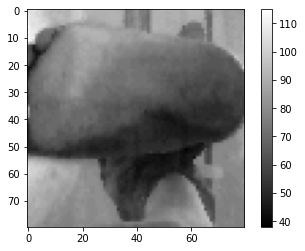

In [9]:
print(plano[5].shape)
plt.figure()
plt.imshow(np.squeeze(plano_training[3]),cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
images = np.concatenate([cavo,normal,plano])
print(len(images))
Images = np.array(images)
print(Images.shape)

35
(35, 80, 80)


In [11]:
etiquetas_cavo = np.repeat(0,9)
etiquetas_normal = np.repeat(1,19)
etiquetas_plano = np.repeat(2,7)

In [12]:
class_names=['Cavo','Normal','Plano']

In [13]:
labels = np.concatenate([etiquetas_cavo,etiquetas_normal,etiquetas_plano])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

35
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
(35,)


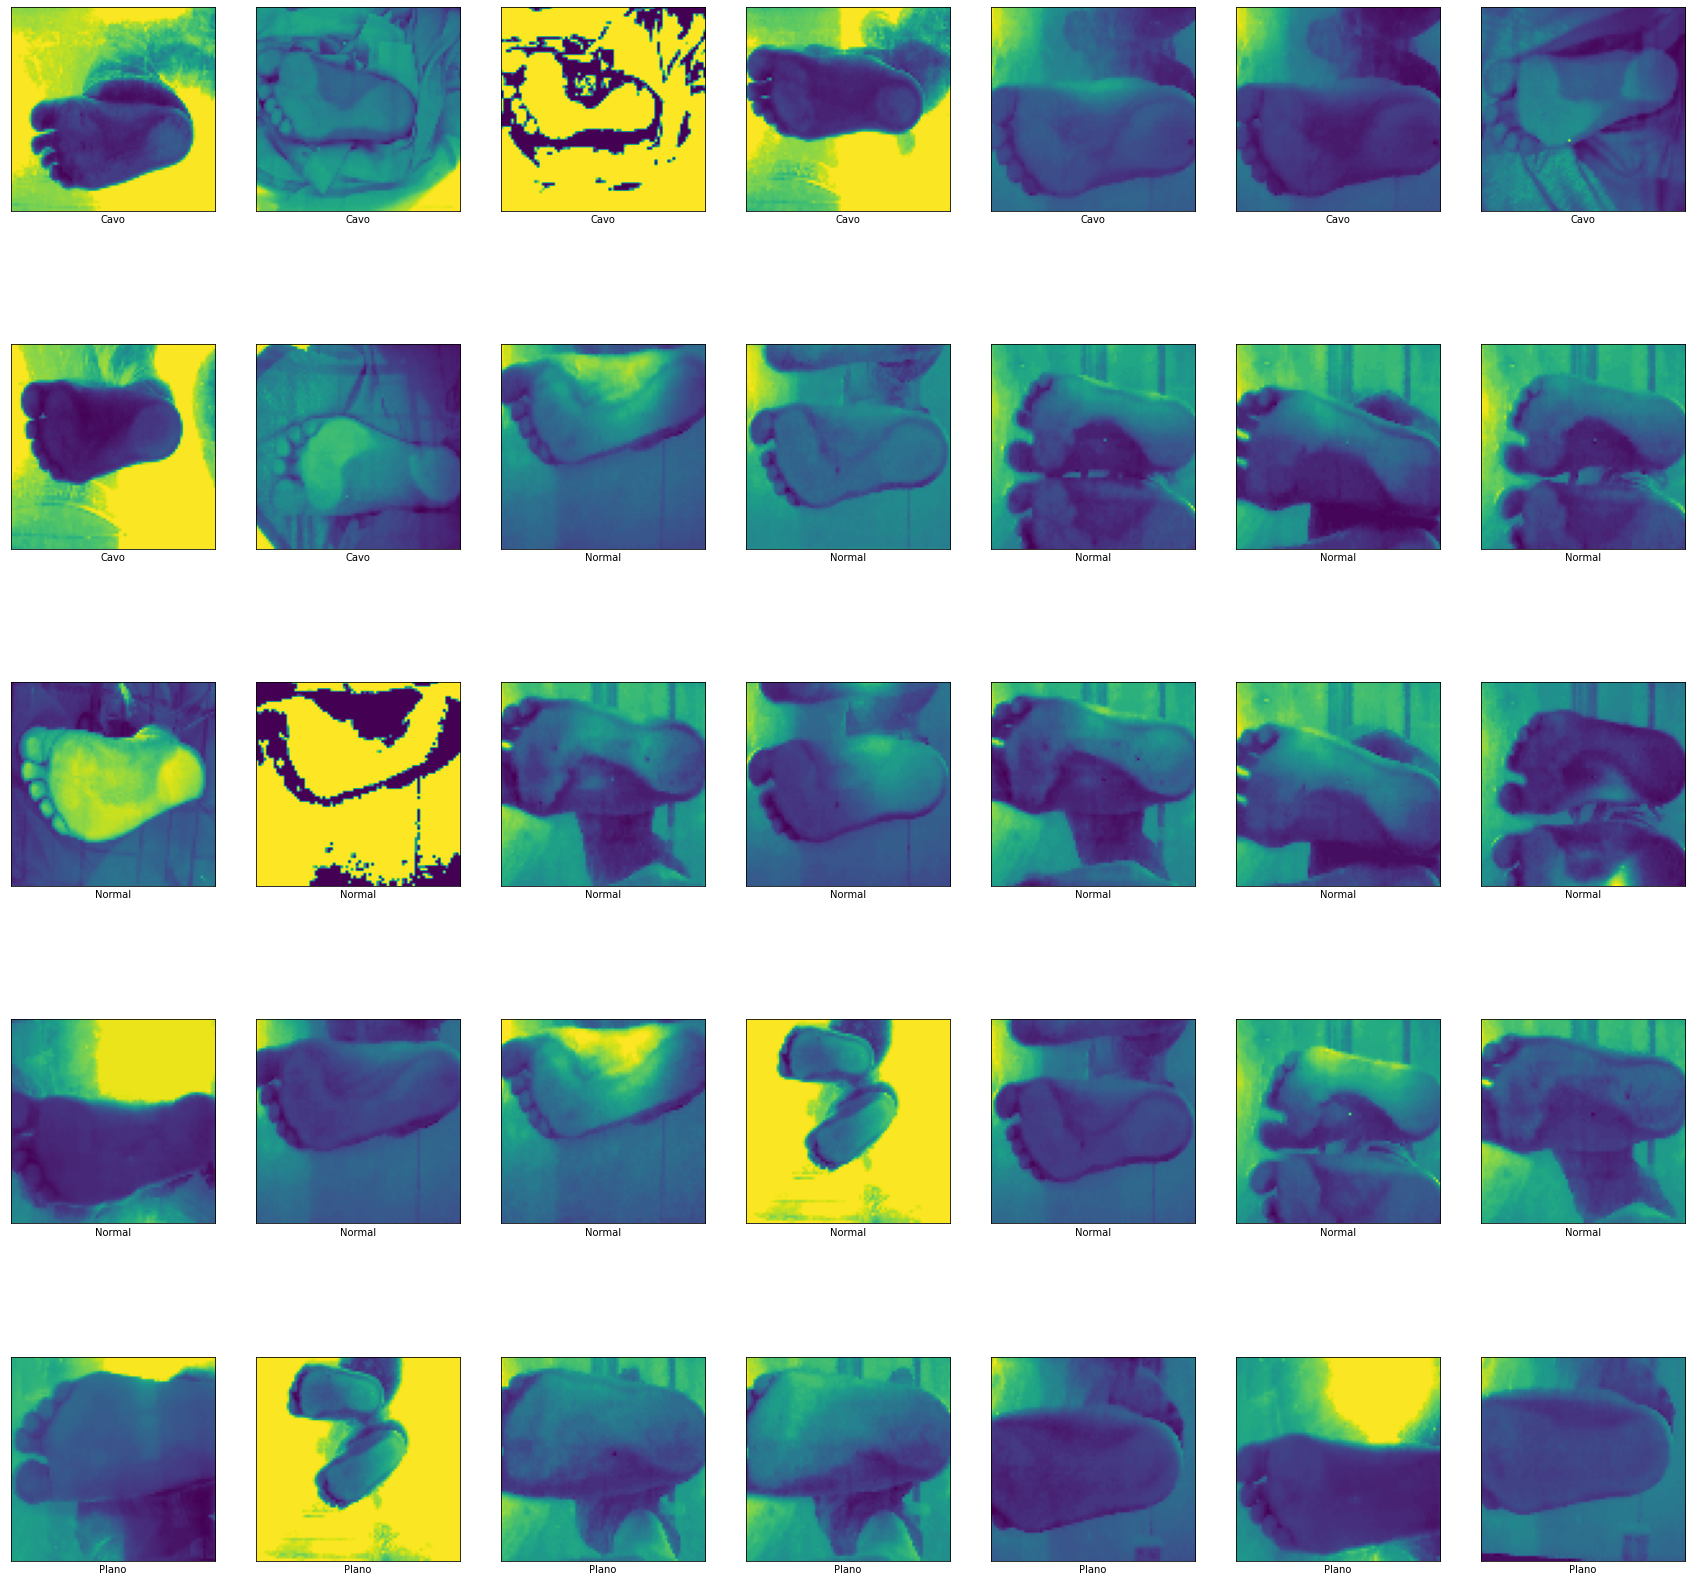

In [14]:
plt.figure(figsize=(30,30))
for i in range(35):
  plt.subplot(5,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
  # cmap=plt.cm.binary
  plt.xlabel(class_names[Labels[i]])
plt.show()  

# Clasificación

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [16]:
print(Images.shape)
Images = np.expand_dims(Images,axis=3)
print(Images.shape)
print(Labels.shape)
print(Labels)

(35, 80, 80)
(35, 80, 80, 1)
(35,)
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]


In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80, 1)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(3, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=110)
trained=model.fit(Images, Labels, epochs=110)

Epoch 1/110
2/2 [==============================] - 1s 14ms/step - loss: 271.4765 - accuracy: 0.2000
Epoch 2/110
2/2 [==============================] - 0s 15ms/step - loss: 1046.0565 - accuracy: 0.4857
Epoch 3/110
2/2 [==============================] - 0s 13ms/step - loss: 763.9484 - accuracy: 0.2286
Epoch 4/110
2/2 [==============================] - 0s 11ms/step - loss: 889.1481 - accuracy: 0.5429
Epoch 5/110
2/2 [==============================] - 0s 10ms/step - loss: 763.3839 - accuracy: 0.5429
Epoch 6/110
2/2 [==============================] - 0s 17ms/step - loss: 379.3809 - accuracy: 0.6000
Epoch 7/110
2/2 [==============================] - 0s 10ms/step - loss: 610.2698 - accuracy: 0.2857
Epoch 8/110
2/2 [==============================] - 0s 11ms/step - loss: 618.2971 - accuracy: 0.2571
Epoch 9/110
2/2 [==============================] - 0s 14ms/step - loss: 409.8309 - accuracy: 0.2857
Epoch 10/110
2/2 [==============================] - 0s 11ms/step - loss: 96.9386 - accuracy: 0.4857

# Prueba con una imagen del dataset

In [31]:
prueba=10
imagen=Images[prueba]
print(imagen.shape)
imagen=(np.expand_dims(imagen,0))
print(imagen.shape)

(80, 80, 1)
(1, 80, 80, 1)


In [32]:
print(Images.shape)
imagencita=np.squeeze(Images)
print(imagencita.shape)

(35, 80, 80, 1)
(35, 80, 80)


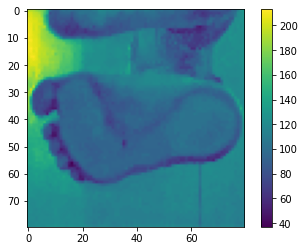

In [33]:
plt.figure()
plt.imshow(imagencita[prueba])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
predictions_single = model.predict(imagen)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

[[0. 1. 0.]]
1.0
1
Normal


# Prueba con imagen externa

(1156, 1689)


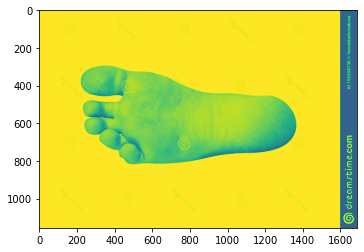

In [46]:
imgg=cv2.imread("prueba.jpg")
imgg_cvt=cv2.cvtColor(imgg,cv2.COLOR_BGR2GRAY)
plt.imshow(imgg_cvt)
plt.show()

In [47]:
img2=imgg_cvt
img2=cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2=(np.expand_dims(img2,0))
print(img2.shape)


(80, 80)
(1, 80, 80)


In [48]:
predictions_single = model.predict(img2)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

[[6.5027686e-20 1.0000000e+00 0.0000000e+00]]
1.0
1
Normal
